In [14]:
library(sf)
library(terra)
library(dplyr)
library(spdep)
library(raster)
library(exactextractr)

library(ggplot2)
library(viridis)
library(stringr)

In [29]:
NFI <- st_read("/projects/my-private-bucket/Data/NFI_data/Brazil/Brazil_NFI_all.gpkg") %>% st_transform(crs=6933)
NFI <- st_zm(NFI)
NFI[is.na(NFI)] = 0
colnames(NFI)
NFI['AGB_all_Mgha'] <- NFI$AGB_Mg.ha2 + NFI$Biomass_TB
st_write(NFI, "/projects/my-private-bucket/Data/NFI_data/Brazil/Brazil_NFI.gpkg")

Writing layer `Brazil_NFI' to data source 
  `/projects/my-private-bucket/Data/NFI_data/Brazil/Brazil_NFI.gpkg' using driver `GPKG'
Writing 16575 features with 18 fields and geometry type Point.


In [15]:
GEDI <- rast('/projects/my-public-bucket/Data/Biomass_maps/GEDI_L4B_v21/GEDI04_B_MW019MW223_02_002_02_R01000M_MU.tif')
GEDI = exactextractr::exact_extract(GEDI,st_buffer(NFI,100), 'mean')

  |======================================================================| 100%



Call:
lm(formula = GEDI ~ NFI$AGB_all_Mgha)

Residuals:
     Min       1Q   Median       3Q      Max 
-1270.00   -18.45   -10.81     4.89   520.07 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      15.189653   0.536892   28.29   <2e-16 ***
NFI$AGB_all_Mgha  0.701182   0.005532  126.76   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 54.5 on 13980 degrees of freedom
  (2593 observations deleted due to missingness)
Multiple R-squared:  0.5348,	Adjusted R-squared:  0.5347 
F-statistic: 1.607e+04 on 1 and 13980 DF,  p-value: < 2.2e-16


Warning message:
“Removed 2600 rows containing non-finite outside the scale range
(`stat_bin2d()`).”
Warning message:
“Removed 90 rows containing missing values or values outside the scale range
(`geom_tile()`).”


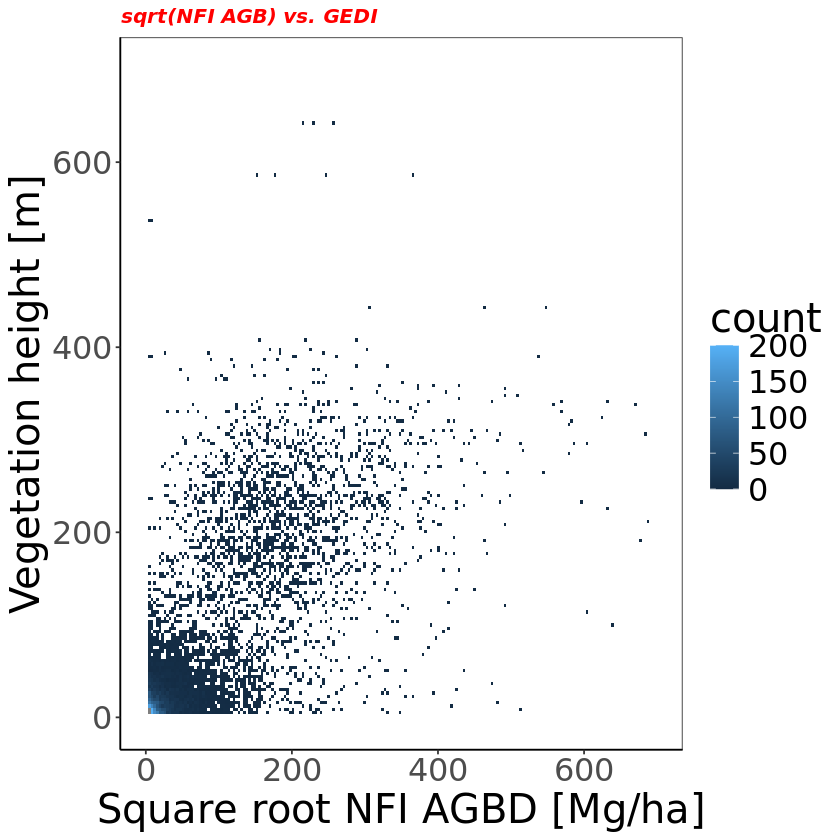

In [28]:
DATA <- cbind(NFI$AGB_all_Mgha,GEDI)
colnames(DATA) = c("agbd.plot","gedi.plot")
summary(lm(GEDI~NFI$AGB_all_Mgha))

ggplot(data=DATA, aes(x=agbd.plot, y=gedi.plot) ) +
  geom_bin2d(bins = 200) +
  scale_fill_gradient(limits = c(0, 200)) + xlab("Square root NFI AGBD [Mg/ha]") + ylab("Vegetation height [m]") + ggtitle("sqrt(NFI AGB) vs. GEDI") +
  xlim(0,700) + ylim(0,700) + theme_bw() + theme(text = element_text(size = 24),plot.title = element_text(color="red", size=12, face="bold.italic"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line = element_line(colour = "black"))